In [61]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

folder1_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\set_a'
folder2_path =  r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\set_b'

def process_audio_file(file_path, output_folder):
    # Load audio file
    custom_sr=5
    audio, sr = librosa.load(file_path, sr= custom_sr)

    time = np.arange(0, len(audio)) / sr

    plt.figure(figsize=(14, 5))
    plt.plot(time, audio)
    plt.title('Heartbeat Sound Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    os.makedirs(output_folder, exist_ok=True)

    plot_path = os.path.join(output_folder, f'{file_name}_waveform.png')
    plt.savefig(plot_path)
    plt.close()

    print(f'Processed: {file_name}')

output_folder1_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a'
output_folder2_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_b'

for file_name in os.listdir(folder1_path):
    file_path = os.path.join(folder1_path, file_name)
    if file_path.endswith('.wav'):
        process_audio_file(file_path, output_folder1_path)

for file_name in os.listdir(folder2_path):
    file_path = os.path.join(folder2_path, file_name)
    if file_path.endswith('.wav'):
        process_audio_file(file_path, output_folder2_path)



Processed: artifact__201012172012
Processed: artifact__201105040918
Processed: artifact__201105041959
Processed: artifact__201105051017
Processed: artifact__201105060108
Processed: artifact__201105061143
Processed: artifact__201105190800
Processed: artifact__201105280851
Processed: artifact__201106010559
Processed: artifact__201106010602
Processed: artifact__201106021541
Processed: artifact__201106030612
Processed: artifact__201106031558
Processed: artifact__201106040722
Processed: artifact__201106040933
Processed: artifact__201106040947
Processed: artifact__201106041452
Processed: artifact__201106050353
Processed: artifact__201106061233
Processed: artifact__201106070537
Processed: artifact__201106070949
Processed: artifact__201106101314
Processed: artifact__201106101955
Processed: artifact__201106110909
Processed: artifact__201106111119
Processed: artifact__201106121242
Processed: artifact__201106121445
Processed: artifact__201106131834
Processed: artifact__201106131835
Processed: art

In [22]:
from PIL import Image, ImageFilter, ImageOps
import os

def refine_and_save_waveform_image(image_path, output_folder):

    img = Image.open(image_path)

    img_gray = ImageOps.grayscale(img)


    img_denoised = img_gray.filter(ImageFilter.MedianFilter(size=3))


    img_contrast = ImageOps.equalize(img_denoised)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)


    refined_path = os.path.join(output_folder, f'refined_{os.path.basename(image_path)}')
    img_contrast.save(refined_path)

    print(f'Refined image saved: {refined_path}')

# Example usage
image_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_a\artifact__201106040722_waveform.png'
output_folder = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a'
refine_and_save_waveform_image(image_path, output_folder)


Refined image saved: C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a\refined_artifact__201106040722_waveform.png


In [31]:
import numpy as np
from PIL import Image
from skimage import exposure, color, filters
import os

def refine_and_save_waveform_image(image_path, output_folder):

    img = Image.open(image_path)


    img = img.convert('RGB')

 
    img_gray = color.rgb2gray(np.array(img, dtype=np.float64) / 255.0)


    img_denoised = filters.median(img_gray)


    img_equalized = exposure.equalize_hist(img_denoised)


    img_final = (img_equalized * 255).astype(np.uint8)

    os.makedirs(output_folder, exist_ok=True)


    refined_path = os.path.join(output_folder, f'refined_{os.path.basename(image_path)}')
    Image.fromarray(img_final).save(refined_path)

    print(f'Refined image saved: {refined_path}')


image_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_a\artifact__201106040722_waveform.png'
output_folder = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a'
refine_and_save_waveform_image(image_path, output_folder)


Refined image saved: C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a\refined_artifact__201106040722_waveform.png


In [37]:
from PIL import Image
from skimage import color, filters
import numpy as np
import os

def preprocess_and_save_waveform(image_path, output_folder):
    img = Image.open(image_path)

    img_gray = img.convert('L')
y
    img_array = np.array(img_gray, dtype=np.float64) / 255.0

    img_denoised = filters.median(img_array)

  
    output_path = os.path.join(output_folder, f'preprocessed_{os.path.basename(image_path)}')
    Image.fromarray((img_denoised * 255).astype(np.uint8)).save(output_path)

image_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_a\artifact__201106040722_waveform.png'
output_folder = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a'
preprocess_and_save_waveform(image_path, output_folder)


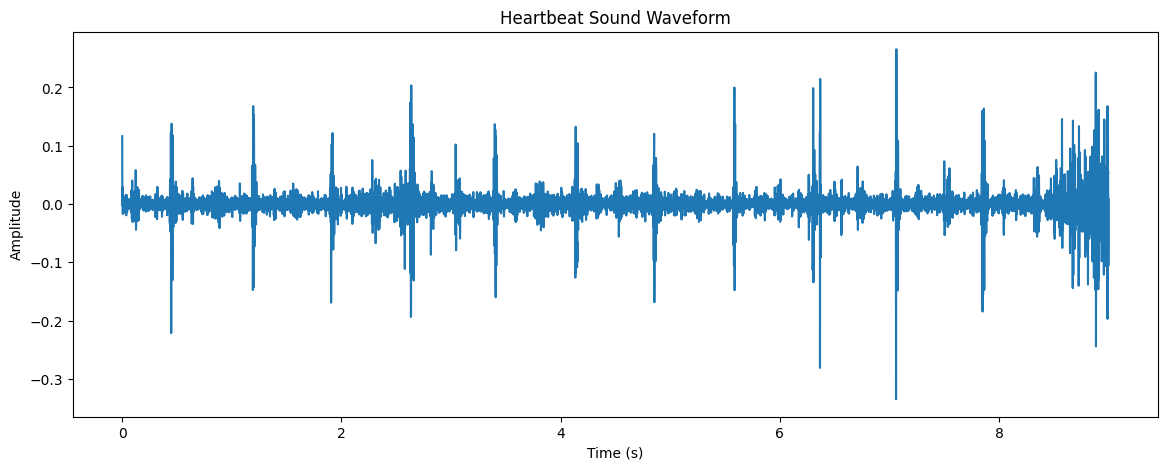

In [58]:
import librosa

audio_path = 'C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\set_a\\artifact__201106040722.wav'
custom_sr = 1000# Replace with your desired sample rate
audio, sr = librosa.load(audio_path, sr=custom_sr)

time = np.arange(0, len(audio)) / sr
plt.figure(figsize=(14, 5))
plt.plot(time, audio)
plt.title('Heartbeat Sound Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
